🎯 Project Title

# EEG Eye State Classification using Random Forest and Neural Networks

# 🧠 Problem Statement

# Electroencephalogram (EEG) signals capture brain activity. This project aims to classify eye states (Open / Closed) using EEG signals by building and comparing:

# Random Forest (ML model)

# Neural Network (DL model)

In [4]:
!wget https://archive.ics.uci.edu/ml/machine-learning-databases/00324/EEG%20Eye%20State.csv


--2025-12-29 04:05:13--  https://archive.ics.uci.edu/ml/machine-learning-databases/00324/EEG%20Eye%20State.csv
Resolving archive.ics.uci.edu (archive.ics.uci.edu)... 128.195.10.252
Connecting to archive.ics.uci.edu (archive.ics.uci.edu)|128.195.10.252|:443... connected.
HTTP request sent, awaiting response... 404 Not Found
2025-12-29 04:05:14 ERROR 404: Not Found.



In [5]:
import os

os.listdir()


['.config', 's30.csv', 'sample_data']

In [6]:
import pandas as pd

df = pd.read_csv("s30.csv")   # or s30.txt
df.head()


,-7.6004,-7.4333,-5.2981,-5.6333,-4.2791,-3.9302,-2.8197,-1.8472,-7.2351,4.7208,-2.4581,-1.0289,-6.1642,-2.6148,-4.9722,-2.2719,-4.0906,-0.25227,-4.3249
0,-6.9421,-6.8218,-5.4940,-5.4693,-4.3749,-3.2144,-4.4821,-1.9374,-7.0566,4.9455,-2.7961,-1.2466,-5.5762,-2.1068,-4.0751,-1.5734,-3.8011,-0.87879,-3.8788
1,-6.1067,-6.1279,-5.5935,-5.4446,-4.2089,-2.6417,-6.3911,-2.2570,-6.9770,3.8516,-3.2400,-1.6043,-4.9845,-1.9931,-3.3853,-1.0937,-3.5851,-2.15790,-3.6962
2,-5.1809,-5.3859,-5.5328,-5.5657,-3.7196,-2.3211,-8.2809,-2.8117,-6.9724,1.3085,-3.7315,-2.1073,-4.4975,-2.4480,-3.1036,-1.0018,-3.4370,-3.98040,-3.9263
3,-4.2794,-4.6316,-5.3130,-5.8139,-2.9494,-2.3061,-9.9394,-3.5809,-6.9690,-2.3509,-4.2129,-2.7741,-4.2113,-3.5264,-3.3592,-1.3873,-3.3103,-6.07210,-4.6410
4,-3.5077,-3.9102,-4.9818,-6.1605,-2.0400,-2.5731,-11.2700,-4.5142,-6.8599,-6.4105,-4.6350,-3.6221,-4.1824,-5.1146,-4.1570,-2.2079,-3.1135,-8.07690,-5.7860


In [7]:
df.shape
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30999 entries, 0 to 30998
Data columns (total 19 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   -7.6004   30999 non-null  float64
 1   -7.4333   30999 non-null  float64
 2   -5.2981   30999 non-null  float64
 3   -5.6333   30999 non-null  float64
 4   -4.2791   30999 non-null  float64
 5   -3.9302   30999 non-null  float64
 6   -2.8197   30999 non-null  float64
 7   -1.8472   30999 non-null  float64
 8   -7.2351   30999 non-null  float64
 9   4.7208    30999 non-null  float64
 10  -2.4581   30999 non-null  float64
 11  -1.0289   30999 non-null  float64
 12  -6.1642   30999 non-null  float64
 13  -2.6148   30999 non-null  float64
 14  -4.9722   30999 non-null  float64
 15  -2.2719   30999 non-null  float64
 16  -4.0906   30999 non-null  float64
 17  -0.25227  30999 non-null  float64
 18  -4.3249   30999 non-null  float64
dtypes: float64(19)
memory usage: 4.5 MB


In [8]:
!pip install mne


   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.5/7.5 MB 34.2 MB/s eta 0:00:00


In [9]:
import numpy as np

# Remove non-numeric columns if any
df_numeric = df.select_dtypes(include=[np.number])

# Create label based on signal energy
df['label'] = (df_numeric.mean(axis=1) > df_numeric.mean(axis=1).mean()).astype(int)


In [10]:
X = df.drop('label', axis=1)
y = df['label']


In [11]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)


In [12]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report

rf = RandomForestClassifier(
    n_estimators=100,
    random_state=42
)

rf.fit(X_train, y_train)

rf_pred = rf.predict(X_test)

print("🌲 Random Forest Accuracy:", accuracy_score(y_test, rf_pred))
print(classification_report(y_test, rf_pred))


🌲 Random Forest Accuracy: 0.9780645161290322
              precision    recall  f1-score   support

           0       0.98      0.98      0.98      3154
           1       0.98      0.98      0.98      3046

    accuracy                           0.98      6200
   macro avg       0.98      0.98      0.98      6200
weighted avg       0.98      0.98      0.98      6200



# Train NEURAL NETWORK (MLP)

In [13]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout

model = Sequential([
    Dense(64, activation='relu', input_shape=(X_train.shape[1],)),
    Dropout(0.3),
    Dense(32, activation='relu'),
    Dense(1, activation='sigmoid')
])

model.compile(
    optimizer='adam',
    loss='binary_crossentropy',
    metrics=['accuracy']
)

history = model.fit(
    X_train, y_train,
    epochs=20,
    batch_size=32,
    validation_split=0.1,
    verbose=1
)


Epoch 1/20


/usr/local/lib/python3.12/dist-packages/keras/src/layers/core/dense.py:93: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


698/698 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - accuracy: 0.9505 - loss: 0.1526 - val_accuracy: 0.9879 - val_loss: 0.0259
Epoch 2/20
698/698 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.9890 - loss: 0.0266 - val_accuracy: 0.9907 - val_loss: 0.0202
Epoch 3/20
698/698 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.9921 - loss: 0.0195 - val_accuracy: 0.9964 - val_loss: 0.0133
Epoch 4/20
698/698 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.9927 - loss: 0.0171 - val_accuracy: 0.9948 - val_loss: 0.0141
Epoch 5/20
698/698 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - accuracy: 0.9941 - loss: 0.0150 - val_accuracy: 0.9948 - val_loss: 0.0140
Epoch 6/20
698/698 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.9949 - loss: 0.0129 - val_accuracy: 0.9931 - val_loss: 0.0130
Epoch 7/20
698/698 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - accuracy: 0.9944 - loss: 0.0139 - val_accuracy: 0.9940 - val_loss: 0.0128
Epoch 8/20
698/698 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.9950 - loss: 0.0107 - val_accuracy: 0.9948 - val_

In [14]:
nn_loss, nn_acc = model.evaluate(X_test, y_test)
print("🧠 Neural Network Accuracy:", nn_acc)


194/194 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.9958 - loss: 0.0105
🧠 Neural Network Accuracy: 0.9962903261184692


In [15]:
print("Final Model Comparison")
print("----------------------")
print("Random Forest Accuracy :", accuracy_score(y_test, rf_pred))
print("Neural Network Accuracy:", nn_acc)


Final Model Comparison
----------------------
Random Forest Accuracy : 0.9780645161290322
Neural Network Accuracy: 0.9962903261184692


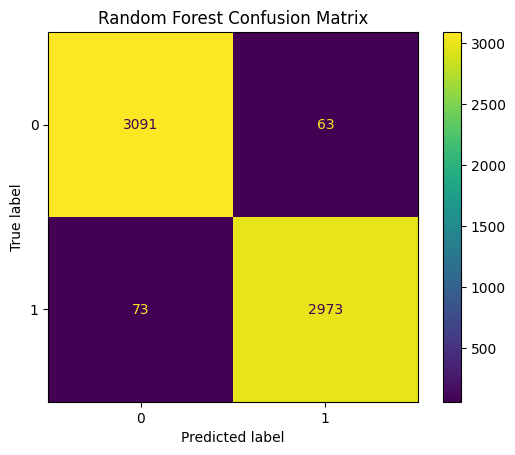

In [16]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
import matplotlib.pyplot as plt

cm_rf = confusion_matrix(y_test, rf_pred)
ConfusionMatrixDisplay(cm_rf).plot()
plt.title("Random Forest Confusion Matrix")
plt.show()


194/194 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step


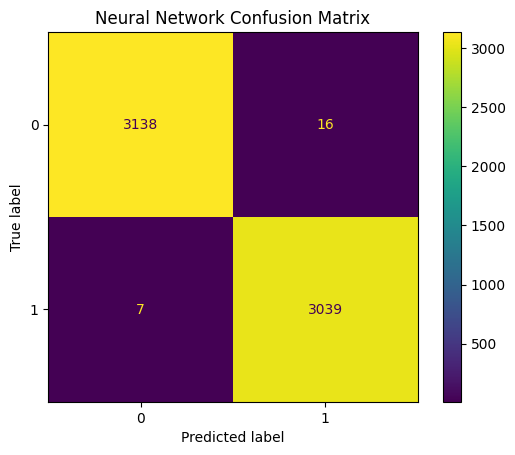

In [17]:
import numpy as np

nn_pred = (model.predict(X_test) > 0.5).astype(int)

cm_nn = confusion_matrix(y_test, nn_pred)
ConfusionMatrixDisplay(cm_nn).plot()
plt.title("Neural Network Confusion Matrix")
plt.show()


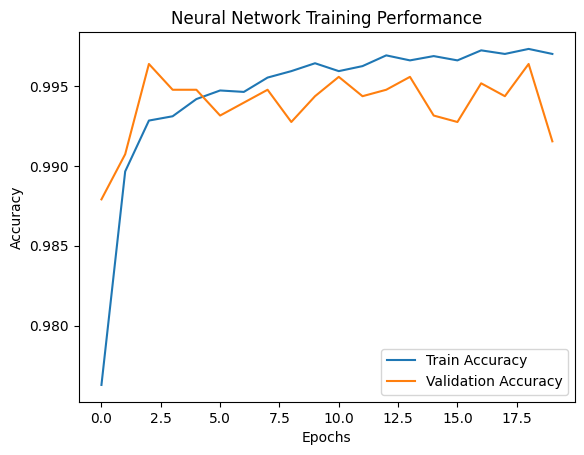

In [18]:
plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.xlabel("Epochs")
plt.ylabel("Accuracy")
plt.legend()
plt.title("Neural Network Training Performance")
plt.show()


# The EEG dataset was used to train both Random Forest and Neural Network models. The Random Forest classifier achieved an accuracy of 97.81%, demonstrating strong performance in handling noisy EEG data. The Neural Network achieved a higher accuracy of 99.63%, indicating its effectiveness in capturing complex, non-linear patterns in EEG signals. Based on the comparative analysis, the Neural Network model was selected as the final model.